In [114]:
# Data manipulation
import numpy as np 
import pandas as pd 
from PIL import Image


import pandas_profiling
# Text manipulation
from string import punctuation
#from stop_words import get_stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP Module
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords


# Extra imports
import seaborn as sns
import matplotlib as plt
from collections import Counter
from itertools import chain 

In [56]:
# Path of folders where data are stored
DATA_PATH = "data/"
FIG_PATH = "fig/"

__Please note that when you see commented code, it is code that might be useful at a moment, but do not focus on it or try to make it works if not asked to.__

# Hands ON 1

## Load Data

In [121]:
# Try to name your data / dataframe explicitly. 
file_name = "raw_scrapped_data.csv.gzip"
file_path = DATA_PATH + file_name

# Reading data
scrapped_data = pd.read_csv(file_path, compression='gzip')

In [122]:
#scrapped_data = pd.read_json(DATA_PATH + "scrapped_data", lines=True)

#import json_lines
#json_data = []
#with open(DATA_PATH + "raw_review_london.jl", 'rb') as f:
#     reader = json_lines.reader(f)
#for line in reader:
#    try:
#        json_data.append(line)
#    except:
#        pass
        
#scrapped_data = pd.DataFrame.from_records(json_data)
#print(scrapped_data.shape)

In [123]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content
0,g186419-d2329575,g186419-d2329575-r162050560,The_Duchess_of_Cambridge_Pub,/Restaurant_Review-g186419-d2329575-Reviews-Th...,5,Old Brand New pub with great food and service,May 2013,"May 27, 2013",NaN,edwardo671,"['New Bern, North Carolina']","[['pencil-paper', '616'], ['thumbs-up-fill', '...","['Value', 'Atmosphere', 'Service', 'Food']","['50', '50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Decided to visit Windsor castle on the way b...
1,g186338-d777616,g186338-d777616-r478335137,Three_Stags,/Restaurant_Review-g186338-d777616-Reviews-Thr...,2,"Nice food, waiter rude",April 2017,"April 23, 2017",NaN,dazcage,"['London, United Kingdom']","[['pencil-paper', '1'], ['thumbs-up-fill', '1']]","['Value', 'Service', 'Food']","['30', '10', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['The food was very good (although rather smal...
2,g186338-d4867760,g186338-d4867760-r352386922,Union_Street_Cafe,/Restaurant_Review-g186338-d4867760-Reviews-Un...,5,A fantastic experience,February 2016,"March 2, 2016",NaN,ashburton88,"['Swindon, United Kingdom']","[['pencil-paper', '11'], ['thumbs-up-fill', '2...","['Value', 'Service', 'Food']","['50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['When looking for somewhere in budget to go a...
3,g186338-d8286686,g186338-d8286686-r733653998,Pure_Cyprus,/Restaurant_Review-g186338-d8286686-Reviews-Pu...,4,Authentic cypriot food,December 2019,"December 19, 2019",NaN,cookie89Manchester,['manchester'],"[['pencil-paper', '154'], ['thumbs-up-fill', '...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['Good menu selection. Unfortunately had no st...
4,g186338-d2482431,g186338-d2482431-r616648426,Browns_Victoria,/Restaurant_Review-g186338-d2482431-Reviews-Br...,3,OK for a drink,September 2018,"September 15, 2018","[""Pakabay, it's upsetting to hear that you did...",pakabay,"['Adelaide, Australia']","[['pencil-paper', '1178'], ['thumbs-up-fill', ...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['We popped in here last night for a glass of ...


In [124]:
# Take only a limited number of our reviews to increase speed / reduce process time
# You may want to start with low number of rows to see if your code works, and then increase this number to perform
# relevant and global analysis

# With sample you can specify a raw value of number of rows you want 
#scrapped_data_sample = scrapped_data.sample(30000)

# Or you can specify a fraction of initial rows
scrapped_data = scrapped_data.sample(frac=0.1)

## Explore Data

In [125]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content
39484,g186338-d5616037,g186338-d5616037-r344805964,Arancina,/Restaurant_Review-g186338-d5616037-Reviews-Ar...,5,"Lovely pizza, lovely staff",January 2016,"February 3, 2016",NaN,CDY1,['London/Amsterdam'],"[['pencil-paper', '46'], ['thumbs-up-fill', '3...","['Value', 'Service', 'Food']","['50', '50', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['Eat in, the pizza is far better nice and fre..."
40862,g186338-d5849096,g186338-d5849096-r232644328,Cafe_Ole,/Restaurant_Review-g186338-d5849096-Reviews-Ca...,1,"Be careful, possible scam happening at this re...",June 2014,"October 5, 2014",NaN,VED47,"['London, United Kingdom']","[['pencil-paper', '3'], ['thumbs-up-fill', '8']]",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,"[""I'm sorry to report that on 2 separate occas..."
26419,g186338-d7267875,g186338-d7267875-r460021999,Crocker_s_Folly,/Restaurant_Review-g186338-d7267875-Reviews-Cr...,3,Such poor service,February 2017,"February 15, 2017",NaN,Spartak55,"['London, United Kingdom']","[['pencil-paper', '203'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['30', '20', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['This is a magnificent place with good food l...
34409,g186338-d1194192,g186338-d1194192-r573206935,Princi,/Restaurant_Review-g186338-d1194192-Reviews-Pr...,3,Nice and expensive,April 2018,"April 14, 2018",NaN,simoneRax1,"['Florence, Italy']","[['pencil-paper', '69'], ['thumbs-up-fill', '2...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['Located near Oxford street I found this rest...
15539,g186338-d6672661,g186338-d6672661-r482401460,Spielburger,/Restaurant_Review-g186338-d6672661-Reviews-Sp...,4,Great Lunch Deal,May 2017,"May 7, 2017","['Hi ebabe69,', 'thank you for your lovely com...",ebabe69,"['Brighton, United Kingdom']","[['pencil-paper', '124'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['50', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Hunting around Hampstead for a late lunch ha..."


In [126]:
scrapped_data.isna().sum()

id_resto                     0
id_comment                   0
resto                        0
resto_url                    0
rating                       0
title                        0
diner_date                 274
rating_date                  0
answer_text               3952
reviewer_pseudo              0
reviewer_origin              0
reviewer_info_sup            0
other_ratings_category       0
other_ratings_value          0
url                          0
content                      0
dtype: int64

In [81]:
scrapped_data.profile_report()

#### b) Basic review cleaning

In [189]:
# Remove punctuation
scrapped_data['clean_title'] = scrapped_data['title'].str.replace('[^\w\s]','')

# Strip trailing whitespace
scrapped_data['clean_title'] = scrapped_data['clean_title'].str.strip(" ")

# Decapitalize letters
scrapped_data['clean_title'] = scrapped_data['clean_title'].apply(lambda x: x.lower())

In [202]:
# Defining basic cleaning function
def basic_cleaning(series):
    # Punctuation
    new_series = series.str.replace('[^\w\s]','')
    # Trailing whitespace
    new_series = new_series.str.strip(" ")
    # Decapitalizing
    new_series = new_series.apply(lambda x: x.lower())
    return new_series

In [210]:
# Defining tokenizing function

## Downloading nltk packages 
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_filter(sentence):
    # Define stopwords
    stop_words = set(stopwords.words('english')) 
    ## Add personalised stop words
    stop_words.add("London")
    
    # Filter the sentence
    word_tokens = word_tokenize(sentence) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return (word_tokens, filtered_sentence) 

[nltk_data] Downloading package stopwords to /Users/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenizing the clean reviews without any stopwords 
tokenized_reviews = scrapped_data["clean_title"].apply(lambda x: tokenize_filter(x)[1])

#### c) Datetime format

In [130]:
scrapped_data["diner_date"] = pd.to_datetime(scrapped_data["diner_date"])
scrapped_data["rating_date"] = pd.to_datetime(scrapped_data["rating_date"])

## Feature Engineering

#### a) Review length

In [131]:
scrapped_data["len_review"] = scrapped_data.apply(lambda x: len(x["title"]), axis=1)

#### b) Weekday

In [132]:
scrapped_data['day_of_week'] = scrapped_data.apply(lambda x: x["rating_date"].day, axis=1)

#### c) Rating and dinner time lapse

In [ ]:
# Month difference - could clearly be improved as a feature
scrapped_data["diner_rating_diff"] = scrapped_data.apply(lambda x: x["diner_date"].month-x["rating_date"].month, axis=1)

In [174]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content,clean_title,len_review,diner_rating_diff,day_of_week
39484,g186338-d5616037,g186338-d5616037-r344805964,Arancina,/Restaurant_Review-g186338-d5616037-Reviews-Ar...,5,"Lovely pizza, lovely staff",2016-01-01,2016-02-03,NaN,CDY1,['London/Amsterdam'],"[['pencil-paper', '46'], ['thumbs-up-fill', '3...","['Value', 'Service', 'Food']","['50', '50', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['Eat in, the pizza is far better nice and fre...",Lovely pizza lovely staff,26,-1.0,3
40862,g186338-d5849096,g186338-d5849096-r232644328,Cafe_Ole,/Restaurant_Review-g186338-d5849096-Reviews-Ca...,1,"Be careful, possible scam happening at this re...",2014-06-01,2014-10-05,NaN,VED47,"['London, United Kingdom']","[['pencil-paper', '3'], ['thumbs-up-fill', '8']]",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,"[""I'm sorry to report that on 2 separate occas...",Be careful possible scam happening at this res...,54,-4.0,5
26419,g186338-d7267875,g186338-d7267875-r460021999,Crocker_s_Folly,/Restaurant_Review-g186338-d7267875-Reviews-Cr...,3,Such poor service,2017-02-01,2017-02-15,NaN,Spartak55,"['London, United Kingdom']","[['pencil-paper', '203'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['30', '20', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['This is a magnificent place with good food l...,Such poor service,17,0.0,15
34409,g186338-d1194192,g186338-d1194192-r573206935,Princi,/Restaurant_Review-g186338-d1194192-Reviews-Pr...,3,Nice and expensive,2018-04-01,2018-04-14,NaN,simoneRax1,"['Florence, Italy']","[['pencil-paper', '69'], ['thumbs-up-fill', '2...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['Located near Oxford street I found this rest...,Nice and expensive,19,0.0,14
15539,g186338-d6672661,g186338-d6672661-r482401460,Spielburger,/Restaurant_Review-g186338-d6672661-Reviews-Sp...,4,Great Lunch Deal,2017-05-01,2017-05-07,"['Hi ebabe69,', 'thank you for your lovely com...",ebabe69,"['Brighton, United Kingdom']","[['pencil-paper', '124'], ['thumbs-up-fill', '...","['Value', 'Service', 'Food']","['50', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,"[""Hunting around Hampstead for a late lunch ha...",Great Lunch Deal,16,0.0,7


## Some visualisations

#### a) Most common words

In [184]:
reviews = scrapped_data["clean_title"].str.split()
most_frequent_words = Counter(chain(*reviews)).most_common()
most_frequent_words

[('food', 805),
 ('and', 600),
 ('Great', 525),
 ('service', 437),
 ('the', 345),
 ('a', 316),
 ('in', 293),
 ('good', 267),
 ('Good', 260),
 ('for', 233),
 ('great', 210),
 ('Excellent', 201),
 ('to', 195),
 ('but', 190),
 ('place', 184),
 ('A', 180),
 ('restaurant', 173),
 ('of', 173),
 ('Amazing', 149),
 ('with', 148),
 ('Very', 142),
 ('lunch', 132),
 ('Lovely', 131),
 ('meal', 128),
 ('Nice', 124),
 ('London', 123),
 ('Food', 114),
 ('atmosphere', 112),
 ('at', 107),
 ('Best', 100),
 ('staff', 98),
 ('experience', 94),
 ('Fantastic', 92),
 ('best', 91),
 ('it', 87),
 ('The', 85),
 ('Italian', 83),
 ('not', 83),
 ('very', 83),
 ('pub', 81),
 ('dinner', 76),
 ('value', 75),
 ('Service', 70),
 ('is', 68),
 ('nice', 68),
 ('Delicious', 67),
 ('visit', 67),
 ('Lunch', 65),
 ('Not', 65),
 ('lovely', 64),
 ('excellent', 64),
 ('on', 62),
 ('Birthday', 60),
 ('friendly', 58),
 ('this', 56),
 ('little', 54),
 ('I', 53),
 ('Wonderful', 52),
 ('was', 51),
 ('be', 49),
 ('Dinner', 49),
 ('you

#### b) Worldcloud of our title reviews

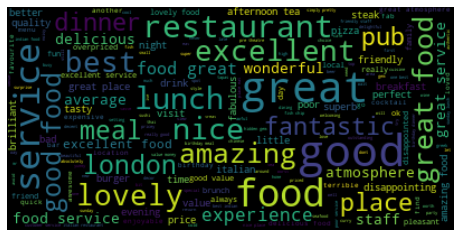

In [188]:
text = scrapped_data['clean_title'].to_string()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Setting max font size to 40 to display more words
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### c) Average rating depending on review length

In [ ]:
sns.catplot(x="rating", y="len_review", data=data)

In [111]:
scrapped_data.groupby("len_review").mean()

,rating,diner_rating_diff
len_review,,
1,5.000000,0.000000
2,3.750000,0.000000
3,4.700000,2.000000
4,3.933333,0.230769
5,3.822222,0.250000
6,4.181818,-0.317073
7,3.772152,0.200000
8,3.950000,0.310345
9,4.175676,0.079137


In [ ]:
# To go further : How to see if the rating associated with the review is related to the length of the comment?
# Test statistic one-way anova

#### d) Presence of not next to a word

## Work on reviews

### Preprocessing

In [ ]:
reviews = data['content'].tolist()


In [ ]:
# Homework function #1 
def basic_cleaning(corpus):

    return corpus

In [ ]:
reviews = basic_cleaning(reviews)

___
___

__<font color='red'>
   Do not go further during Hands On 1, work on your visualizations instead !! 
</font>__
 
___
___

# Hands On 2

## Stemming

In [ ]:
def lemmatize_review(tokens):

    return tokens

___
___

__<font color='red'>
    Do not go further during Hands On 2, explore different stemmer/lemmatizer and their paramters instead !
</font>__
 
___
___

# Hands On 3

## Bag of Words

## TFIDF

In [ ]:
# You can use your own function to vectorize (TF or TF-IDF), but it is recommened to use libraries when possible.
# It is way more scalable and lot of functionnalities are implemented

In [ ]:
# Try different parameters from TfidfVectorizer

## WordClouds

In [ ]:
# Define a mask for wordcloud
image = Image.open(FIG_PATH + "plate.jpg")
plate_mask = np.array(image)

## Function from corpus to wordcloud

In [ ]:
# Homework function 2 
def from_corpus_to_word_cloud(text_column):
    
    return 

# Homeworks

For homework you are asked to code 2 functions : 
- A function that do the basic cleaning of a corpus
- A function that creates a wordcloud from a cleaned corpus

Bonus : Be creative about text visualisations, and on how to get relevant insights from your reviews